In [4]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/z/Users/Kevin/Pictures/tbg/"

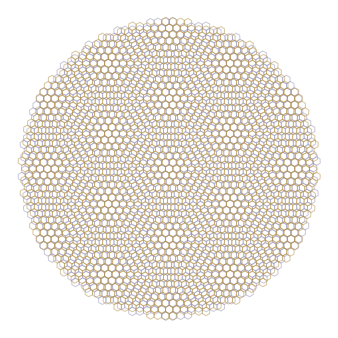

In [6]:
grid, ax = create_hex_grid(nx=50,
                              ny=50,
                              rotate_deg=-3,
                              min_diam=1,
                              crop_circ=20,
                              edge_color=(150/255,147/255,181/255, 0.5),
                              do_plot=True)
create_hex_grid(nx=50,
                ny=50,
                min_diam=1,
                rotate_deg=3,
                crop_circ=20,
                do_plot=True,
                edge_color=(179/255,143/255,68/255, 0.5),
                h_ax=ax)

ax.axis('off')

plt.savefig(base_dir + "fig1.png", dpi=300)

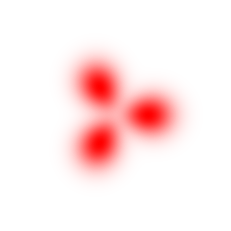

In [7]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(1, 1)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ (1, 0, 0, 0), (1, 0, 0, 1),])

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
R = 2
Z = np.exp(-(X-R)**2 - Y**2) + \
    np.exp(-(X+R/2)**2 - (Y+R*np.sqrt(3)/2)**2) + \
    np.exp(-(X+R/2)**2 - (Y-R*np.sqrt(3)/2)**2)
Z = Z / (X ** 2 + Y ** 2 + 0.7)

ax.imshow(Z, cmap='rainbow_alpha')


ax.set_aspect('equal')
ax.axis('off')

plt.savefig(base_dir + "fig1_WF.png", dpi=300, transparent=True)

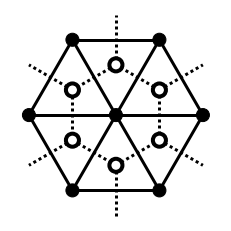

In [48]:
from matplotlib import collections as mc

fig, ax = plt.subplots(1, 1, figsize=[4, 4])

R = 4
CR = 0.3
P = [(0, 0), (R, 0), (-R, 0), (-R/2, R * np.sqrt(3)/2), (R/2, R * np.sqrt(3)/2), (-R/2, -R * np.sqrt(3)/2), (R/2, -R * np.sqrt(3)/2)]
for p in P:
    ax.add_patch(plt.Circle(p, CR, color='k'))

ax.add_collection(mc.LineCollection([(P[x], P[y]) for x, y in
    [
        (0, 1), (0, 2), (3, 4), (5, 6),
        (0, 3), (0, 4),
        (1, 4), (2, 3),
        (0, 5), (0, 6),
        (1, 6), (2, 5)
    ]
], color='k', lw=3))


P = [(R / np.sqrt(3) * np.cos(x + np.pi/6), R / np.sqrt(3) * np.sin(x + np.pi/6)) for x in np.linspace(0, 2 * np.pi, 7)[:-1]]

ax.add_collection(mc.LineCollection([(P[x], P[y]) for x, y in
    [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)
    ]
] + [(P[i], (P[i][0] * 2, P[i][1] * 2)) for i in range(len(P))
], color='k', lw=3, ls=(0, (1, 1))))


for p in P:
    ax.add_patch(plt.Circle(p, CR, ec="k", color="white", fill=True, lw=4, zorder=100))


ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_aspect('equal')

ax.axis("off")
plt.savefig(base_dir + "fig1_lat.png", dpi=300, transparent=True)

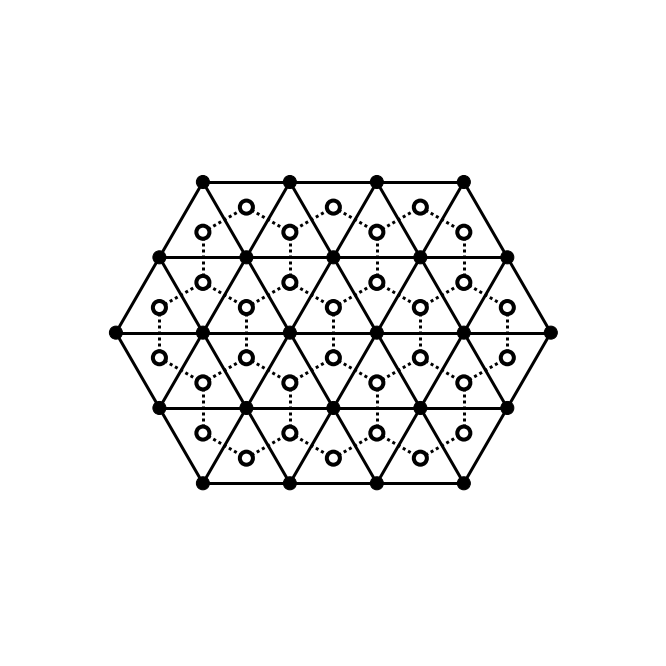

In [55]:
from matplotlib import collections as mc

fig, ax = plt.subplots(1, 1, figsize=[12, 12])

R = 4
CR = 0.3
Hexa = []
HexaLines = []

for y in range(-2, 3, 1):
    for x in range(6 - abs(y)):
        Hexa.append((R * x + R / 2 * abs(y), R * y * np.sqrt(3) / 2))
        if x != 0:
            HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
        if y > 0:
            HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 1)))
            HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 2)))
        if y < 0:
            HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y))))
            HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y) - 1)))
    
for p in Hexa:
    ax.add_patch(plt.Circle(p, CR, color='k'))

ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='k', lw=3))

Dual = []
DualLines = []

for y in range(-1, 3, 1):
    if y > 0:
        lim = (0, (6 - abs(y)) * 2 - 1)
    else:
        lim = (1, (6 - abs(y)) * 2 - 2)
    for x in range(*lim):
        Dual.append((R * x / 2 + R / 2 * abs(y), R * y * np.sqrt(3) / 2 - (R / np.sqrt(3) if x % 2 == 0 else R * np.sqrt(3) / 2 - R / np.sqrt(3))))
        if x != lim[0]:
            DualLines.append((len(Dual) - 2, len(Dual) - 1))

for i in range(0, 8, 2):
    DualLines.append((i, i + 8))
    DualLines.append((i + 17, i + 8 + 17))
for i in range(0, 10, 2):
    DualLines.append((i + 7, i + 9 + 7))
    
for p in Dual:
    ax.add_patch(plt.Circle(p, CR, ec="k", color="white", fill=True, lw=4, zorder=100))

ax.add_collection(mc.LineCollection([(Dual[x], Dual[y]) for x, y in DualLines], color='k', lw=3, ls=(0, (1, 1))))

ax.set_xlim([-5, 25])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')

ax.axis("off")
plt.savefig(base_dir + "fig1_lat2.png", dpi=300, transparent=True)